In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
data=pd.read_excel('G:\iris.xlsx')

In [42]:
data.head()

,status,card_present_flag,account,currency,long_lat,not,Unnamed: 6,txn_description,merchant_id,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,Unnamed: 22,Unnamed: 23,Unnamed: 24,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,153.41,27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,153.38,27.99,NaN,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,153.41,27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,151.21,33.87,NaN,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,151.23,33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,151.21,33.87,NaN,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,153.10,27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,153.05,26.68,NaN,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,153.41,27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,153.44,28.06,NaN,debit


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   not                12043 non-null  float64       
 6   Unnamed: 6         12043 non-null  float64       
 7   txn_description    12043 non-null  object        
 8   merchant_id        7717 non-null   object        
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [44]:
data.describe()

,card_present_flag,not,Unnamed: 6,balance,age,amount,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,7717.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,7717.000000,0.0
mean,0.802644,143.648563,38.164347,14704.195553,30.582330,187.933588,91.910205,32.752651,NaN
std,0.398029,16.669352,54.622791,31503.722652,10.046343,592.599934,69.494955,5.282423,NaN
min,0.000000,114.620000,12.370000,0.240000,18.000000,0.100000,0.000000,12.330000,NaN
25%,1.000000,138.690000,30.750000,3158.585000,22.000000,16.000000,0.000000,29.440000,NaN
50%,1.000000,145.230000,33.890000,6432.010000,28.000000,29.000000,140.780000,33.840000,NaN
75%,1.000000,151.220000,37.700000,12465.945000,38.000000,53.655000,150.940000,37.710000,NaN
max,1.000000,255.000000,573.000000,267128.520000,78.000000,8835.980000,153.610000,43.310000,NaN


In [45]:
data=data.drop(columns='txn_description', axis=1)
data.corr()

,card_present_flag,not,Unnamed: 6,balance,age,amount,Unnamed: 22,Unnamed: 23,Unnamed: 24
card_present_flag,1.000000,-0.008446,-0.000340,0.005925,-0.008405,-0.002074,0.004434,-0.002840,NaN
not,-0.008446,1.000000,0.682094,-0.022436,0.031728,-0.000677,0.070791,0.062331,NaN
Unnamed: 6,-0.000340,0.682094,1.000000,-0.014786,-0.068866,0.015175,-0.007816,0.096253,NaN
balance,0.005925,-0.022436,-0.014786,1.000000,0.199329,0.059178,-0.119436,0.135806,NaN
age,-0.008405,0.031728,-0.068866,0.199329,1.000000,0.029980,-0.057019,0.125215,NaN
amount,-0.002074,-0.000677,0.015175,0.059178,0.029980,1.000000,-0.329188,0.014456,NaN
Unnamed: 22,0.004434,0.070791,-0.007816,-0.119436,-0.057019,-0.329188,1.000000,0.061510,NaN
Unnamed: 23,-0.002840,0.062331,0.096253,0.135806,0.125215,0.014456,0.061510,1.000000,NaN
Unnamed: 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data=data.drop(columns='extraction', axis=1)
data.corr()

,card_present_flag,not,Unnamed: 6,balance,age,amount,Unnamed: 22,Unnamed: 23,Unnamed: 24
card_present_flag,1.000000,-0.008446,-0.000340,0.005925,-0.008405,-0.002074,0.004434,-0.002840,NaN
not,-0.008446,1.000000,0.682094,-0.022436,0.031728,-0.000677,0.070791,0.062331,NaN
Unnamed: 6,-0.000340,0.682094,1.000000,-0.014786,-0.068866,0.015175,-0.007816,0.096253,NaN
balance,0.005925,-0.022436,-0.014786,1.000000,0.199329,0.059178,-0.119436,0.135806,NaN
age,-0.008405,0.031728,-0.068866,0.199329,1.000000,0.029980,-0.057019,0.125215,NaN
amount,-0.002074,-0.000677,0.015175,0.059178,0.029980,1.000000,-0.329188,0.014456,NaN
Unnamed: 22,0.004434,0.070791,-0.007816,-0.119436,-0.057019,-0.329188,1.000000,0.061510,NaN
Unnamed: 23,-0.002840,0.062331,0.096253,0.135806,0.125215,0.014456,0.061510,1.000000,NaN
Unnamed: 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data=data.drop(columns='card_present_flag', axis=1)
data.corr()

,not,Unnamed: 6,balance,age,amount,Unnamed: 22,Unnamed: 23,Unnamed: 24
not,1.000000,0.682094,-0.022436,0.031728,-0.000677,0.070791,0.062331,NaN
Unnamed: 6,0.682094,1.000000,-0.014786,-0.068866,0.015175,-0.007816,0.096253,NaN
balance,-0.022436,-0.014786,1.000000,0.199329,0.059178,-0.119436,0.135806,NaN
age,0.031728,-0.068866,0.199329,1.000000,0.029980,-0.057019,0.125215,NaN
amount,-0.000677,0.015175,0.059178,0.029980,1.000000,-0.329188,0.014456,NaN
Unnamed: 22,0.070791,-0.007816,-0.119436,-0.057019,-0.329188,1.000000,0.061510,NaN
Unnamed: 23,0.062331,0.096253,0.135806,0.125215,0.014456,0.061510,1.000000,NaN
Unnamed: 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
data=data.drop(columns='merchant_state', axis=1)
data.corr()

,not,Unnamed: 6,balance,age,amount,Unnamed: 22,Unnamed: 23,Unnamed: 24
not,1.000000,0.682094,-0.022436,0.031728,-0.000677,0.070791,0.062331,NaN
Unnamed: 6,0.682094,1.000000,-0.014786,-0.068866,0.015175,-0.007816,0.096253,NaN
balance,-0.022436,-0.014786,1.000000,0.199329,0.059178,-0.119436,0.135806,NaN
age,0.031728,-0.068866,0.199329,1.000000,0.029980,-0.057019,0.125215,NaN
amount,-0.000677,0.015175,0.059178,0.029980,1.000000,-0.329188,0.014456,NaN
Unnamed: 22,0.070791,-0.007816,-0.119436,-0.057019,-0.329188,1.000000,0.061510,NaN
Unnamed: 23,0.062331,0.096253,0.135806,0.125215,0.014456,0.061510,1.000000,NaN
Unnamed: 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data=data.drop(columns='Unnamed: 23', axis=1)
data.corr()

,not,Unnamed: 6,balance,age,amount,Unnamed: 22,Unnamed: 24
not,1.000000,0.682094,-0.022436,0.031728,-0.000677,0.070791,NaN
Unnamed: 6,0.682094,1.000000,-0.014786,-0.068866,0.015175,-0.007816,NaN
balance,-0.022436,-0.014786,1.000000,0.199329,0.059178,-0.119436,NaN
age,0.031728,-0.068866,0.199329,1.000000,0.029980,-0.057019,NaN
amount,-0.000677,0.015175,0.059178,0.029980,1.000000,-0.329188,NaN
Unnamed: 22,0.070791,-0.007816,-0.119436,-0.057019,-0.329188,1.000000,NaN
Unnamed: 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
data=data.drop(columns='Unnamed: 24', axis=1)
data.corr()

,not,Unnamed: 6,balance,age,amount,Unnamed: 22
not,1.000000,0.682094,-0.022436,0.031728,-0.000677,0.070791
Unnamed: 6,0.682094,1.000000,-0.014786,-0.068866,0.015175,-0.007816
balance,-0.022436,-0.014786,1.000000,0.199329,0.059178,-0.119436
age,0.031728,-0.068866,0.199329,1.000000,0.029980,-0.057019
amount,-0.000677,0.015175,0.059178,0.029980,1.000000,-0.329188
Unnamed: 22,0.070791,-0.007816,-0.119436,-0.057019,-0.329188,1.000000


In [62]:
data.isnull().sum()

status               0
account              0
currency             0
long_lat             0
not                  0
Unnamed: 6           0
first_name           0
balance              0
date                 0
gender               0
age                  0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
Unnamed: 22          0
movement             0
dtype: int64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   account            12043 non-null  object        
 2   currency           12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   not                12043 non-null  float64       
 5   Unnamed: 6         12043 non-null  float64       
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  amount             12043 non-null  float64       
 12  transaction_id     12043 non-null  object        
 13  country            12043 non-null  object        
 14  custom

In [64]:
data.corr()

,not,Unnamed: 6,balance,age,amount,Unnamed: 22
not,1.000000,0.682094,-0.022436,0.031728,-0.000677,0.070791
Unnamed: 6,0.682094,1.000000,-0.014786,-0.068866,0.015175,-0.007816
balance,-0.022436,-0.014786,1.000000,0.199329,0.059178,-0.119436
age,0.031728,-0.068866,0.199329,1.000000,0.029980,-0.057019
amount,-0.000677,0.015175,0.059178,0.029980,1.000000,-0.329188
Unnamed: 22,0.070791,-0.007816,-0.119436,-0.057019,-0.329188,1.000000


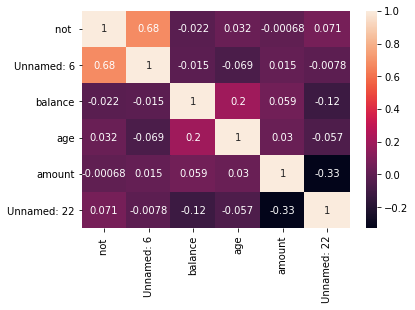

In [65]:
sns.heatmap(data.corr(), annot=True)

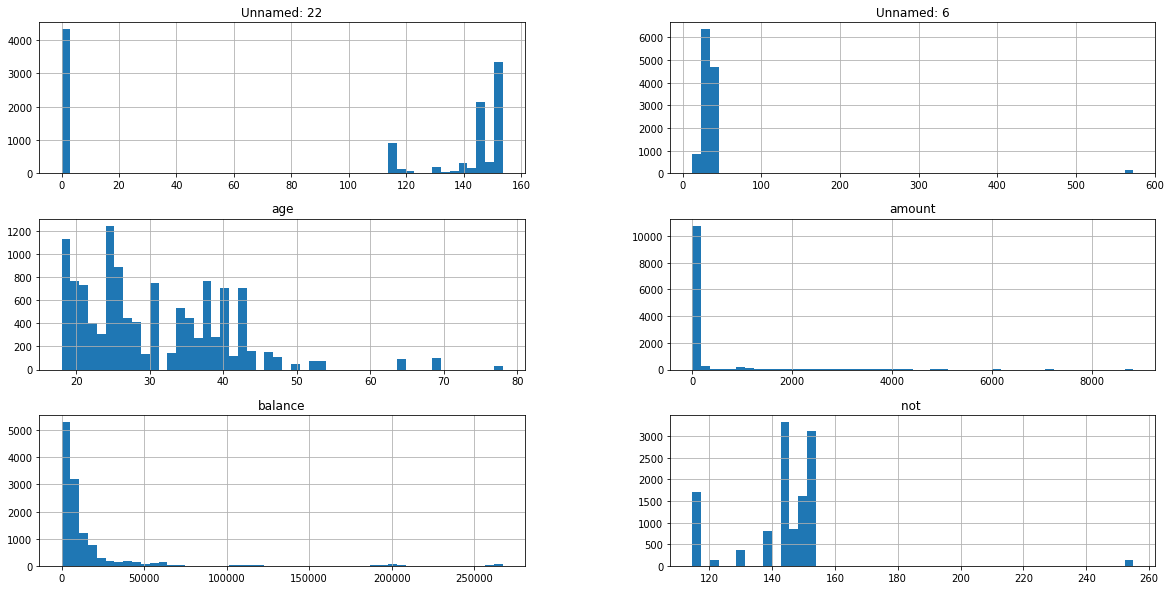

In [66]:
data.hist(bins=50,figsize=(20,10))
plt.show()

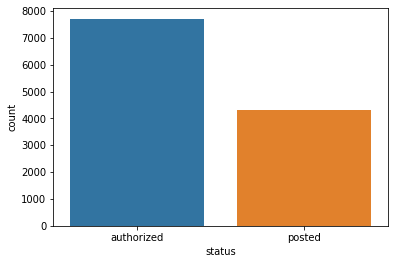

In [68]:
import seaborn as sns
sns.countplot(x=data['status'])

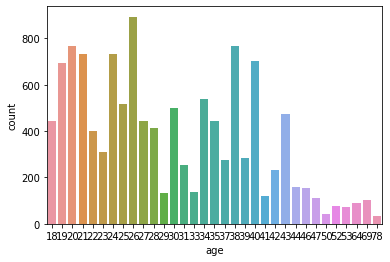

In [69]:
import seaborn as sns
sns.countplot(x=data['age'])

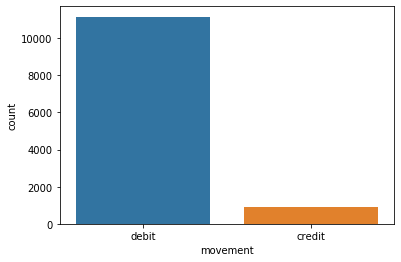

In [71]:
import seaborn as sns
sns.countplot(x=data['movement'])

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

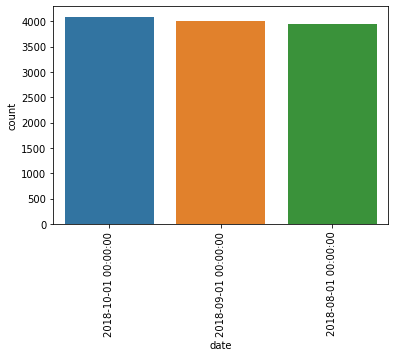

In [86]:
sns.countplot(x=data['date'], order=data['date'].value_counts().head(20).index)
plt.xticks(rotation=90)

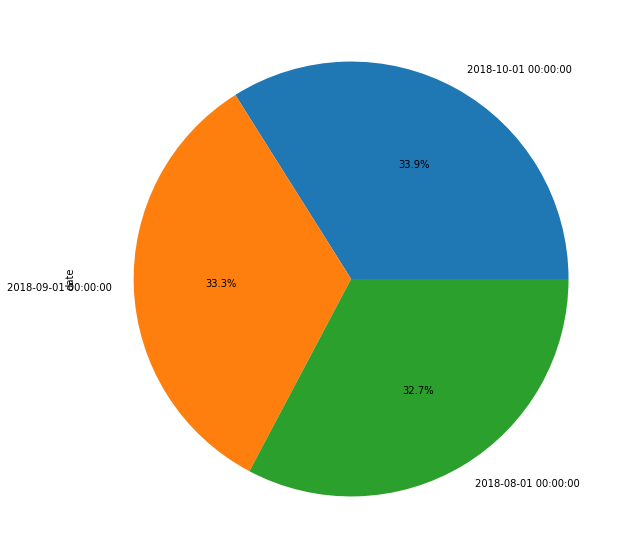

In [90]:
plt.figure(figsize=(10,10))
data['date'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()